# Exploration Strategies in Reinforcement Learning

In this assignment, you will explore various strategies for balancing exploration and exploitation in a multi-armed bandit setup. Understanding how different strategies navigate the exploration-exploitation trade-off is crucial in reinforcement learning. You will implement and compare the following strategies:
1. Random Exploration
2. Epsilon-Greedy (with varying epsilon values)
3. Epsilon-Greedy with Decay (You can design their own decay schedule)
4. Upper Confidence Bound (UCB)


## Problem Statement

Consider a scenario where you have `N` slot machines, each with a different probability of payout. Your objective is to maximize your rewards over a series of trials. Unlike traditional problems, you don't know the payout probabilities in advance. Your challenge is to balance between exploring different slot machines to discover their payout rates and exploiting the machines you currently believe have the highest payout rates.


## Your Task

Complete the `Bandit` class, the `ucb` function, and the `run_experiment` function based on the hints provided. Then, test your implementation by running experiments with predefined bandit probabilities. Look for `### START CODE HERE ###` and `### END CODE HERE ###` comments in the code to guide you.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Use seaborn to make plots nicer

sns.set()
sns.set_palette('colorblind')
sns.set_context("paper")

# Set the style
sns.set_style('whitegrid')

## The Bandit Class

We start by defining a `Bandit` class to represent each slot machine. This class will have methods to simulate pulling the machine's arm and updating our estimate of its win rate.


In [3]:
class Bandit:
    def __init__(self, p):
        self.p = p  # The true win rate
        self.p_estimate = 0.0 # The estimated win rate
        self.N = 0  # number of samples collected so far
    
    def pull(self):
        # pass
        ### START CODE HERE ###
        # TODO: Simulate pulling the arm. Recall that True is also regarded as 1 and False is regarded as 0 ###
        # Hint: Use np.random.random() and compare with self.p to simulate a dense probability distribution
        prob = np.random.random()
        return prob < self.p
        ### END CODE HERE ###
    
    def update(self, x):
        # pass
        ## START CODE HERE ###
        # TODO: Update the win rate estimate and increment N ###
        # Hint: Calculate the new estimate as a weighted average of the old estimate and the new sample `x`
        self.N += 1 # Increment the number of samples
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N
        ### END CODE HERE ###


## The Upper Confidence Bound (UCB) Function

The UCB algorithm selects the bandit to play based on both the estimated win rates and the uncertainty or variance in these estimates. Implement the UCB calculation in the function below.


In [4]:
def ucb(mean, n, nj):
    # pass
    ### START CODE HERE ###
    # TODO: Implement the UCB formula to calculate the upper confidence bound ###
    # Hint: UCB = estimated win rate + exploration factor. The exploration factor can be calculated using np.sqrt(2 * np.log(n) / nj)
    exploration_factor = np.sqrt(2 * np.log(n) / nj)
    return mean + exploration_factor
    ### END CODE HERE ###


## Running the Experiment

We will now set up our experiment to compare how different exploration strategies affect the learning performance and rewards. Focus on implementing the selection logic for each strategy within the `run_experiment` function.


In [33]:
def run_experiment(bandit_probs, N, strategy="ucb", epsilon=0.1, decay_rate=0.99):
    bandits = [Bandit(p) for p in bandit_probs]
    rewards = np.zeros(N)
    total_plays = 0
    
    # Strategy selection
    
    # Below is an example of lambda function that returns a random bandit, refer to this for the implementation of other strategies
    if strategy == "random":
        selection_strategy = lambda: np.random.choice(len(bandits))
    
    ### START CODE HERE ###
    # TODO: Implement the epsilon-greedy strategy.
    # HINT: With probability epsilon, select a random bandit; otherwise, select the bandit with the highest estimated win rate.
    elif strategy == "epsilon-greedy":
        # pass
        # Uncomment and complete the implementation below
        # selection_strategy = lambda: np.random.choice([...], p=[...])
        selection_strategy = lambda: np.random.choice(len(bandits)) if np.random.random() < epsilon else np.argmax([b.p_estimate for b in bandits])

    
    # TODO: Implement the epsilon-greedy with decay strategy.
    # HINT: Start with a high value of epsilon for more exploration and decrease it over time to shift towards exploitation.
    # You need to customize the decay schedule you want.
    elif strategy == "epsilon-greedy-decay":
        # Uncomment and customize the decay schedule as needed
        current_epsilon = epsilon  # You might want to update this within the loop
        selection_strategy = lambda: np.random.choice(len(bandits)) if np.random.random() < current_epsilon else np.argmax([b.p_estimate for b in bandits])
    
    # TODO: Implement the UCB strategy.
    # HINT: Use the ucb function to calculate the upper confidence bound for each bandit and select the bandit with the highest bound.
    elif strategy == "ucb":
        pass
        # Uncomment and complete the implementation below
        selection_strategy = lambda: np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
    
    ### END CODE HERE ###
    
    else:
        raise ValueError("Unsupported strategy")
    
    # Initialization: Play each bandit once - No changes needed
    for j in range(len(bandits)):
        x = bandits[j].pull()
        bandits[j].update(x)
        total_plays += 1
        rewards[total_plays - 1] = x

    ### START CODE HERE ###
    for i in range(N):
        if strategy == "epsilon-greedy-decay":
            # TODO: Update current_epsilon using the decay rate
            current_epsilon *= decay_rate
        # TODO: Implement the main loop to play N rounds
        # Hint: For each iter, use the `selection_strategy()` function to obtain the bandit to pull, then simulate pulling that bandit and obtain new reward `x`. Update that bandit's estimate and the total number of plays.
        # Finally, store `x` in the `rewards` array for final visualization.
        bandit_index = selection_strategy()
        x = bandits[bandit_index].pull()
        bandits[bandit_index].update(x)
        total_plays += 1
        rewards[i] = x
    ### END CODE HERE ###
    

    # Plotting the results - No changes needed
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(N) + 1)

    plt.plot(win_rates, label=strategy)

    # Displaying the estimated probabilities - No changes needed
    for b in bandits:
        print(f'Strategy {strategy} epsilon {epsilon} : Estimated probability of bandit, {b.p_estimate}')
    print('Total Reward:', rewards.sum())

Strategy random epsilon 0.1 : Estimated probability of bandit, 0.21114369501466276
Strategy random epsilon 0.1 : Estimated probability of bandit, 0.5210355987055015
Strategy random epsilon 0.1 : Estimated probability of bandit, 0.7705382436260623
Total Reward: 504.0
Strategy epsilon-greedy epsilon 0.1 : Estimated probability of bandit, 0.24324324324324326
Strategy epsilon-greedy epsilon 0.1 : Estimated probability of bandit, 0.5142857142857142
Strategy epsilon-greedy epsilon 0.1 : Estimated probability of bandit, 0.7572502685284637
Total Reward: 731.0
Strategy epsilon-greedy-decay epsilon 0.1 : Estimated probability of bandit, 0.3333333333333333
Strategy epsilon-greedy-decay epsilon 0.1 : Estimated probability of bandit, 0.6666666666666666
Strategy epsilon-greedy-decay epsilon 0.1 : Estimated probability of bandit, 0.7658930373360239
Total Reward: 764.0
Strategy ucb epsilon 0.1 : Estimated probability of bandit, 0.21212121212121218
Strategy ucb epsilon 0.1 : Estimated probability of ba

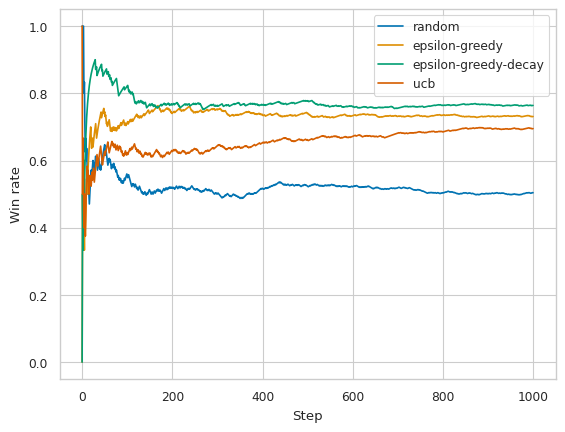

In [55]:
bandit_probs = [0.2, 0.5, 0.75]  # Bandit win rates
N = 1000  # Number of rounds

# Run experiments with different strategies
for strategy in ["random", "epsilon-greedy", "epsilon-greedy-decay", "ucb"]:
    run_experiment(bandit_probs, N, strategy=strategy)

plt.xlabel('Step')
plt.ylabel('Win rate')
plt.legend()
plt.savefig('bandit_4d1.png')


Strategy random epsilon 0.1 : Estimated probability of bandit, 0.08888888888888893
Strategy random epsilon 0.1 : Estimated probability of bandit, 0.6018808777429467
Strategy random epsilon 0.1 : Estimated probability of bandit, 0.36419753086419765
Total Reward: 342.0
Strategy epsilon-greedy epsilon 0.1 : Estimated probability of bandit, 0.09375
Strategy epsilon-greedy epsilon 0.1 : Estimated probability of bandit, 0.5958378970427156
Strategy epsilon-greedy epsilon 0.1 : Estimated probability of bandit, 0.43103448275862066
Total Reward: 572.0
Strategy epsilon-greedy-decay epsilon 0.1 : Estimated probability of bandit, 0.4
Strategy epsilon-greedy-decay epsilon 0.1 : Estimated probability of bandit, 0.5867768595041323
Strategy epsilon-greedy-decay epsilon 0.1 : Estimated probability of bandit, 0.3333333333333333
Total Reward: 579.0
Strategy ucb epsilon 0.1 : Estimated probability of bandit, 0.0625
Strategy ucb epsilon 0.1 : Estimated probability of bandit, 0.594660194174758
Strategy ucb e

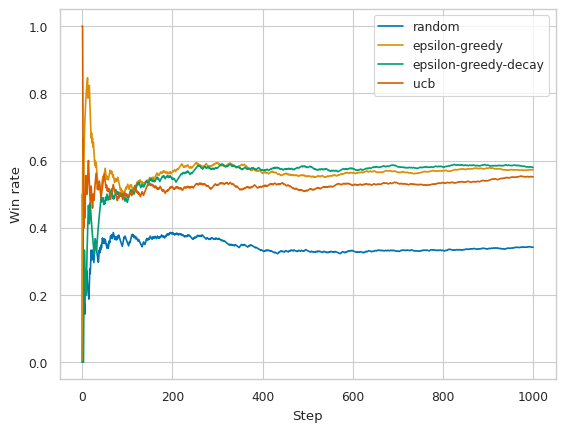

In [56]:
# Example usage
bandit_probs = [0.1, 0.6, 0.4]  # Define the probabilities of winning for each bandit
N = 1000  # Number of rounds to play

# Run experiments with different strategies
for strategy in ["random", "epsilon-greedy", "epsilon-greedy-decay", "ucb"]:
    run_experiment(bandit_probs, N, strategy=strategy)

plt.xlabel('Step')
plt.ylabel('Win rate')
plt.legend()
plt.savefig('bandit_4d2.png')

## Reflection and Analysis

After running the experiments, reflect on the performance of each strategy. Consider the following questions:
- Which strategy achieved the highest cumulative reward? Why do you think this was the case?
- How did the performance of the epsilon-greedy strategy change with different values of epsilon?
- How did the decaying epsilon schedule affect the exploration-exploitation balance over time?
- In what ways did the UCB strategy outperform or underperform compared to the others?

This exercise should give you insights into how different exploration strategies can influence the learning and decision-making process in reinforcement learning scenarios.
